<a href="https://colab.research.google.com/github/nanikon/artificial-intelligence-systems/blob/main/lab2/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа №2

## Входные данные и инициализация

In [1]:
import networkx as nx
%matplotlib inline

Строковые литералы городов

In [2]:
vilnus = "Вильнюс"
brest = "Брест"
vitebsk = "Витебск"
voronez = "Воронеж"
volgograd = "Волгоград"
niz_novgorod = "Нижний Новгород"
daygavpils = "Даугавпилс"
kaliningrad = "Калининград"
kaynas = "Каунас"
kiev = "Киев"
zitomir = "Житомир"
doneck = "Донецк"
kichinev = "Кишинев"
st_petersburg = "Санкт-Петербург"
riga = "Рига"
moscow = "Москва"
kazan = "Казань"
minsk = "Минск"
murmansk = "Мурманск"
orel = "Орел"
odessa = "Одесса"
tallin = "Таллин"
harkov = 'Харьков'
simferopol = "Симферополь"
yaroslavl = "Ярославль"
yfa = "Уфа"
samara = "Самара"

Граф в матричном представлении

In [3]:
cities = {
    vilnus: {brest: 531, vitebsk: 360, daygavpils: 211, kaliningrad: 333, kaynas: 102, kiev: 734}, #6
    brest: {vilnus: 531, vitebsk: 638, kaliningrad: 699}, # 3
    vitebsk: {brest: 638, vilnus: 360, voronez: 869, volgograd: 1455, niz_novgorod: 911, st_petersburg: 602, orel: 522}, #7
    voronez: {vitebsk: 869, volgograd: 581, yaroslavl: 739}, #3
    volgograd: {vitebsk: 1455, voronez: 581, zitomir: 1493}, #3
    niz_novgorod: {vitebsk: 911, moscow: 411}, #2
    daygavpils: {vilnus: 211}, #1
    kaliningrad: {brest: 699, vilnus: 333, st_petersburg: 739}, #3
    kaynas: {vilnus: 102, riga: 267}, #2
    kiev: {vilnus: 734, zitomir: 131, kichinev: 467, odessa: 487, harkov: 471}, #5
    zitomir: {kiev: 131, doneck: 863, volgograd: 1493}, #3
    doneck: {zitomir: 863, kichinev: 812, moscow: 1084, orel: 709}, #4
    kichinev: {kiev: 467, doneck: 812}, #2
    st_petersburg: {vitebsk: 602, kaliningrad: 739, riga: 641, moscow: 664, murmansk: 1412}, #5
    riga: {st_petersburg: 641, kaynas: 267, tallin: 308}, #3
    moscow: {kazan: 815, niz_novgorod: 411, minsk: 690, doneck: 1084, st_petersburg: 664, orel: 368}, #6
    kazan: {moscow: 815, yfa: 525}, #2
    minsk: {moscow: 690, murmansk: 2238, yaroslavl: 940}, #3
    murmansk: {st_petersburg: 1412, minsk: 2238}, #2
    orel: {vitebsk: 522, doneck: 709, moscow: 368}, #3
    odessa: {kiev: 487}, #1
    tallin: {riga: 308}, #1
    harkov: {kiev: 471, simferopol: 639}, #2
    simferopol: {harkov: 639}, #1
    yaroslavl: {voronez: 739, minsk: 940}, #2
    yfa: {kazan: 525, samara: 461}, #2
    samara: {yfa: 461} #1
}

Отрисовка

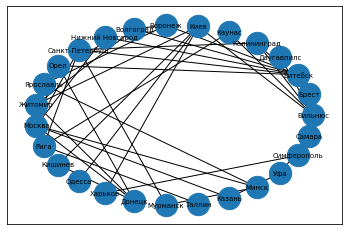

In [39]:
G = nx.Graph()
for first_city in cities.keys():
    for second_city in cities[first_city]:
        G.add_edge(first_city, second_city, weight = cities[first_city][second_city])
nx.draw_networkx(G, pos=nx.circular_layout(G), with_labels = True, font_size = 7, node_size=500)

Входные данные

In [6]:
count_city = 27
start_city = harkov
final_city = niz_novgorod

Базовая функция для восстановления пути по словарю с родителями

In [10]:
def get_path(parents):  
  path = []
  len_path = 0
  current_city = final_city
  while (current_city != start_city):
    path.append(current_city)
    next_city = parents[current_city]
    len_path += cities[current_city][next_city]
    current_city = next_city
  path.append(start_city)
  path.reverse()
  return len_path, path

## Неинформированный поиск

Поиск в ширину (сложность О(v + e), v - кол-во вершин, e - кол-во ребер)

In [11]:
from collections import deque

def bfs():
    visited = set()
    queue = deque()
    queue.append(start_city)
    parents = dict()
    while (len(queue) != 0):
        current_city = queue.popleft()
        for city in cities[current_city]:
            if (city not in visited):
                queue.append(city)
                visited.add(city)
                parents[city] = current_city
        if current_city == final_city:
            break
    len_path, path = get_path(parents)
    print(path)
    print(len_path)
    
bfs()

['Харьков', 'Киев', 'Вильнюс', 'Витебск', 'Нижний Новгород']
2476


Поиск в глубину (сложность О(v + e), v - кол-во вершин, e - кол-во ребер)

In [12]:
from collections import deque

def dfs():
  visited = set()
  stack = deque()
  stack.append(start_city)
  parents = dict()
  while(len(stack) != 0):
    current_city = stack.pop()
    if current_city == final_city:
      break
    for city in cities[current_city]:
      if (city not in visited):
        stack.append(city)
        visited.add(city)
        parents[city] = current_city
  len_path, path = get_path(parents)
  print(path)
  print(len_path)

dfs()

['Харьков', 'Киев', 'Кишинев', 'Донецк', 'Орел', 'Витебск', 'Нижний Новгород']
3892


Поиск с ограничением глубины

In [13]:
from collections import deque

def is_int(s):
    try:
        int(s)
        return True
    except ValueError:
        return False

def dfs_depth_limitation(limit_depth):
  if limit_depth < 1:
    print('limit_depth must be more or equal one')
    return False
  if not(is_int(str(limit_depth))):
    print('limit_depth must be integer')
    return False
  visited = set()
  stack = deque()
  stack.append((start_city, 0))
  parents = dict()
  while(len(stack) != 0):
    current_city, depth = stack.pop()
    if (depth >= limit_depth):
      continue
    for city in cities[current_city]:
      if not(city in visited):
        stack.append((city, depth + 1))
        visited.add(city)
        parents[city] = current_city
        if city == final_city:
          stack.clear()
  path = []
  len_path = 0
  current_city = final_city
  success = True
  while (current_city != start_city):
    path.append(current_city)
    try:
      next_city = parents[current_city]
      len_path += cities[current_city][next_city]
      current_city = next_city
    except KeyError as e:
      success = False
      break
  if success:
    path.append(start_city)
    path.reverse()
    print(path)
    print(len_path)
  else:
    print("Can't find path with", limit_depth, "depth limitation")
  return success

dfs_depth_limitation(6)

['Харьков', 'Киев', 'Кишинев', 'Донецк', 'Орел', 'Витебск', 'Нижний Новгород']
3892


True

Поиск с итеративным углублением

In [14]:
def dfs_iteration_limit():
  success = False
  i = 1
  while (not success):
    success = dfs_depth_limitation(i)
    i += 1

dfs_iteration_limit()

Can't find path with 1 depth limitation
Can't find path with 2 depth limitation
Can't find path with 3 depth limitation
Can't find path with 4 depth limitation
['Харьков', 'Киев', 'Кишинев', 'Донецк', 'Москва', 'Нижний Новгород']
3245


Двунаправленный поиск

In [15]:
from collections import deque

def bidirectional_bfs():
    visited = set()
    start_queue = deque()
    start_queue.append(start_city)
    final_queue = deque()
    final_queue.append(final_city)
    start_parents = dict()
    final_parents = dict()
    medium_city = ""
    while(len(start_queue) != 0 or len(final_queue) != 0):
      start_current_city = start_queue.popleft()
      final_current_city = final_queue.popleft()
      is_continue = True
      for city in cities[start_current_city]:
        if (city not in visited):
          start_queue.append(city)
          visited.add(city)
          start_parents[city] = start_current_city
        elif city in final_parents:
          is_continue = False
          start_parents[city] = start_current_city
          medium_city = city
          break
      for city in cities[final_current_city]:
        if (city not in visited):
          final_queue.append(city)
          visited.add(city)
          final_parents[city] = final_current_city
        elif city in start_parents:
          is_continue = False
          final_parents[city] = final_current_city
          medium_city = city
          break
      if not is_continue:
        break
    path = []
    len_path = 0
    current_city = medium_city
    while (current_city != start_city):
        path.append(current_city)
        next_city = start_parents[current_city]
        len_path += cities[current_city][next_city]
        current_city = next_city
    path.append(start_city)
    path.reverse()
    current_city = medium_city
    while (current_city != final_city):
      next_city = final_parents[current_city]
      len_path += cities[current_city][next_city]
      current_city = next_city
      path.append(current_city)
    print(path)
    print(len_path)
bidirectional_bfs()

['Харьков', 'Киев', 'Вильнюс', 'Витебск', 'Нижний Новгород']
2476


## Информированный поиск 

Жадный поиск по первому наилучшему соответствию

In [16]:
def greedy_for_first_best_match():
  len = 0
  path = [start_city]
  current_city = start_city
  visited = set()
  while (current_city != final_city):
    visited.add(current_city)
    candidat = ""
    part_len = 1000000
    for city in cities[current_city]:
      if ((cities[current_city][city] < part_len) & (city not in visited)):
        part_len = cities[current_city][city]
        candidat = city
    path.append(candidat)
    current_city = candidat
    len += part_len
  print(len)
  print(path)

greedy_for_first_best_match()

2953
['Харьков', 'Киев', 'Житомир', 'Донецк', 'Орел', 'Москва', 'Нижний Новгород']


Данные расстояния по прямой взяты с http://rasstoyanie.info/

In [17]:
straight_distance = {
  vilnus: 1194,
  brest: 1401,
  vitebsk: 874,
  voronez: 607,
  volgograd: 849,
  niz_novgorod: 0,
  daygavpils: 1086,
  kaliningrad: 1488,
  kaynas: 1273,
  kiev: 1107,
  zitomir: 1222,
  doneck: 1017,
  kichinev: 1468,
  st_petersburg: 899,
  riga: 1219,
  moscow: 403,
  kazan: 323,
  minsk: 1081,
  murmansk: 1511,
  orel: 634,
  odessa: 1428,
  tallin: 1189,
  harkov: 875,
  simferopol: 1443,
  yaroslavl: 289,
  yfa: 774,
  samara: 524
}

Метод минимизации суммарной оценки стоимости решения A*

In [19]:
def min_total_score_a():
  queue = [(0, start_city)]
  visited = set()
  parents = dict()
  minimus = dict()
  result_len = 0
  while (len(queue) != 0):
    queue.sort(key= lambda x: x[0])
    current_function, current_city = queue.pop(0)
    visited.add(current_city)
    if (current_city == final_city):
      result_len = current_function
      break
    for city in cities[current_city]:
      function = current_function + cities[current_city][city] + straight_distance[city]
      if (city not in visited) and ((city not in minimus) or (minimus[city] > function)):
        minimus[city] = function
        parents[city] = current_city
        queue.append((function, city))
  len_path, path = get_path(parents)
  print(len_path)
  print(path)
  
min_total_score_a()

2476
['Харьков', 'Киев', 'Вильнюс', 'Витебск', 'Нижний Новгород']
